In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Loading the Dataset
def load_data():
  #MNIST & NIST dataset
  digits_data_train = pd.read_csv("./data/mnist_train.csv")
  digits_data_test = pd.read_csv("./data/mnist_test.csv")
  letters_dataset = pd.read_csv("./data/A_Z Handwritten Data.csv")
  digits_data = pd.concat([digits_data_train, digits_data_test], ignore_index=True)

  # Renaming 0th column as label
  digits_data.rename(columns={'0':'label'}, inplace=True)
  letters_dataset.rename(columns={'0':'label'}, inplace=True)

  # Selecting only 1000 samples from each class
  digits_data = digits_data.groupby('label').head(1000)
  letters_dataset = letters_dataset.groupby('label').head(1000)

  # Spliting data into X(digits) and Y(letters) for each type
  Y1 = digits_data['label']
  X1 = digits_data.drop('label', axis=1)
  Y2 = letters_dataset["label"]
  X2 = letters_dataset.drop("label", axis=1)

  # Spliting data into train and test set
  x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, train_size=0.9)
  x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, train_size=0.9)

  # Converting into numpy array for preprocessing
  x_train1 = x_train1.to_numpy()
  x_test1 = x_test1.to_numpy()
  x_train2 = x_train2.to_numpy()
  x_test2 = x_test2.to_numpy()

  # Add ten to match number of classes for one-hot
  y_train2 = y_train2 + 10
  y_test2 = y_test2 + 10

  # Convert Y into one-hot vectors
  y_train1 = to_categorical(y_train1, num_classes=36)
  y_test1 = to_categorical(y_test1, num_classes=36)
  y_train2 = to_categorical(y_train2, num_classes=36)
  y_test2 = to_categorical(y_test2, num_classes=36)

  # Reshape Xs into CNN input dimension
  x_train1 = x_train1.reshape(x_train1.shape[0], 28, 28, 1)
  x_test1 = x_test1.reshape(x_test1.shape[0], 28, 28, 1)
  x_train2 = x_train2.reshape(x_train2.shape[0], 28, 28, 1)
  x_test2 = x_test2.reshape(x_test2.shape[0], 28, 28, 1)

  # Combine each X and Y from each dataset
  x_train = np.concatenate((x_train1, x_train2), axis=0)
  x_test = np.concatenate((x_test1, x_test2), axis=0)
  y_train = np.concatenate((y_train1, y_train2), axis=0)
  y_test = np.concatenate((y_test1, y_test2), axis=0)

  return x_train, x_test, y_train, y_test

In [4]:
# Pre Processing the data
def preprocessing(x_train, x_test):
  x_train = x_train / 255
  x_test = x_test / 255
  return x_train, x_test

In [5]:
# Loading the data
x_train, x_test, y_train, y_test = load_data()
(x_train, x_test) = preprocessing(x_train, x_test)

In [6]:
# Initialize Keras image generator
generator = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

In [7]:
# CNN Model
model = Sequential([
    Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation="relu"),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=5, strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters=64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=5, strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, kernel_size=4, activation="relu"),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(36, activation="softmax")
])

In [8]:
# Compiling and training the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(generator.flow(x_train, y_train, batch_size=64), epochs=30, steps_per_epoch=x_train.shape[0]/64, validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
507/506 [==============================] - 8s 16ms/step - loss: 1.5624 - accuracy: 0.5672 - val_loss: 1.2451 - val_accuracy: 0.6214
Epoch 2/30
507/506 [==============================] - 8s 15ms/step - loss: 0.5427 - accuracy: 0.8298 - val_loss: 0.2226 - val_accuracy: 0.9183
Epoch 3/30
507/506 [==============================] - 8s 15ms/step - loss: 0.4108 - accuracy: 0.8672 - val_loss: 0.2115 - val_accuracy: 0.9303
Epoch 4/30
507/506 [==============================] - 8s 15ms/step - loss: 0.3411 - accuracy: 0.8900 - val_loss: 0.1682 - val_accuracy: 0.9375
Epoch 5/30
507/506 [==============================] - 8s 15ms/step - loss: 0.3087 - accuracy: 0.8980 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 6/30
507/506 [==============================] - 8s 15ms/step - loss: 0.2867 - accuracy: 0.9028 - val_loss: 0.1774 - val_accuracy: 0.9386
Epoch 7/30
507/506 [==============================] - 8s 16ms/step

In [9]:
# Saving the model
model.save('new_model.h5')

In [14]:
np.save('my_history.npy',history.history)

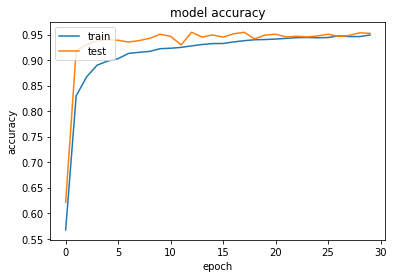

In [16]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

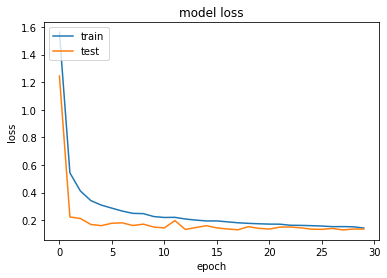

In [17]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()